(0.0, 9.5, 0.0066928509242848572, 0.98901305736940681)

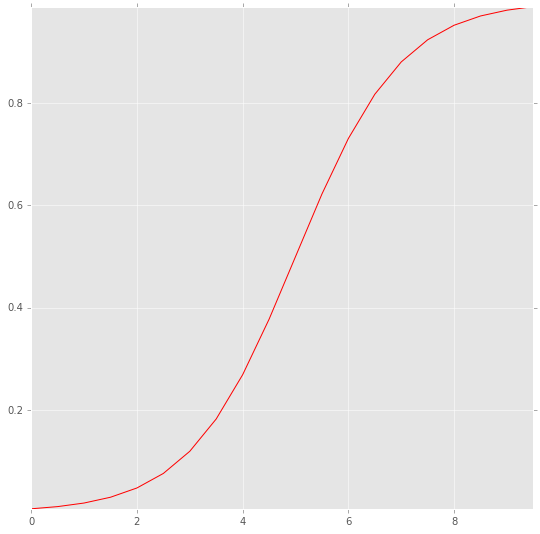

In [24]:
# Sigmod Function
# - the logistic function looks like an elongated S
# - Reference: http://hamelg.blogspot.com/2015/11/

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

####################
# Input Values Here:
Xmin = -5
Xmax = 5
Incr = 0.5
Offset = 5
###################

plt.figure(figsize=(9,9))

 # Define the sigmoid function
def sigmoid(t):                         
    return (1/(1 + np.e**(-t)))    

plot_range = np.arange(Xmin, Xmax, Incr) 
y_values = sigmoid(plot_range)

# Plot curve
plt.plot(plot_range + Offset, y_values, color="red")
plt.axis('tight')